In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import src.analysis.robustness_testing as rt
import src.analysis.community_aware_centrality as cac
import src.analysis.mod_deltas as md
import src.analysis.network_sim as ns
import src.analysis.old_functions as of
from src.visualization import visualize

In [3]:
def loadPARoads():
    g = ig.Graph.Read_Picklez('../data/processed/roadNet-PA.pkl.gz')
    g.vs['name'] = list(map(str, range(g.vcount())))
    if g.is_weighted():
        weight_key = 'weight'
    else:
        weight_key = None
    part = g.community_leiden(objective_function='modularity',
                             weights=weight_key)
    return g, part

def loadUserNet():
    g = ig.Graph.Read_Pickle('../data/processed/user_net.pkl')
    part = pd.read_pickle('../data/processed/user_part.pkl')
    return g, part

In [4]:
# ans = ns.main()

In [5]:
net_name = 'Election Week'

In [6]:
if net_name == 'PA Roads':
    g, part = loadPARoads()
elif net_name == 'Election Week':
    g, part = loadUserNet()
else:
    print('wrong name')

In [7]:
type(g.vs[0]['name']), part.summary(), part.modularity, g.vcount(), g.ecount(), g.is_weighted()

(str,
 'Clustering with 7523125 elements and 557 clusters',
 0.6907899506032462,
 7523125,
 130086491,
 True)

In [8]:
value_results = pd.read_pickle(f'../reports/results/{net_name}_value_results.pkl')


In [9]:
masuda_values, rho, sigma, rho_e = rt.initial_attack(g, part, cac.masuda,
                                                 calculations=30,
                                                  return_values=True)
value_results[cac.masuda.__name__] = masuda_values
node_cost = np.trapz(y=sigma, x=rho)
edge_cost = np.trapz(y=sigma, x=rho_e)
print(f'node cost: {node_cost}, edge cost: {edge_cost}')
print()

node cost: 0.06969773964286365, edge cost: 0.6940383122303084



In [11]:
cd_values = cac.community_degree(g, part)
value_results[cac.community_degree.__name__] = cd_values

In [34]:
centralities = [cac.modularity_vitality,
                cac.absolute_modularity_vitality,
                cac.adjusted_modular_centrality_degree,
                cac.masuda,
                cac.community_hub_bridge,
                cac.weighted_modular_centrality_degree,
                cac.community_degree,
                cac.degree]

In [12]:
abbreviations = {'modularity_vitality': 'MV',
                'absolute_modularity_vitality': 'AMV',
                'adjusted_modular_centrality_degree': 'AMC-D',
                'masuda': 'Mas',
                'community_hub_bridge': 'CHB',
                'weighted_modular_centrality_degree': 'WMC-D',
                 'community_degree':'CD',
                'degree': 'Deg'}

In [48]:
sigma_results = {}
value_results = {}
for centrality_func in centralities:
    values, rho, sigma, rho_e = rt.initial_attack(g, part, centrality_func,
                                                 calculations=35,
                                                  return_values=True)
    sigma_results[centrality_func.__name__] = [rho, sigma, rho_e]
    value_results[centrality_func.__name__] = values
    print(f'finished {centrality_func.__name__}')

finished modularity_vitality
finished absolute_modularity_vitality
finished adjusted_modular_centrality_degree
finished masuda
finished community_hub_bridge
finished weighted_modular_centrality_degree
finished community_degree
finished degree


In [15]:
# pd.to_pickle(sigma_results, f'../reports/results/{net_name}_sigma_results.pkl')
pd.to_pickle(value_results, f'../reports/results/{net_name}_value_results_w_cd2.pkl')

In [49]:
for function, (rho, sigma, rho_e) in sigma_results.items():
    node_cost = np.trapz(y=sigma, x=rho)
    edge_cost = np.trapz(y=sigma, x=rho_e)
    print(function, ':')
    print(f'node cost: {node_cost}, edge cost: {edge_cost}')
    print()

modularity_vitality :
node cost: 0.017278456048843177, edge cost: 0.023880485099309255

absolute_modularity_vitality :
node cost: 0.020116262518677867, edge cost: 0.03579191430135282

adjusted_modular_centrality_degree :
node cost: 0.0188037041604453, edge cost: 0.035030526239755014

masuda :
node cost: 0.0159070535255117, edge cost: 0.03018360713948515

community_hub_bridge :
node cost: 0.1586328276200807, edge cost: 0.28003038686968057

weighted_modular_centrality_degree :
node cost: 0.1163260260694927, edge cost: 0.254244461704562

community_degree :
node cost: 0.12752815905751885, edge cost: 0.2647636268928545

degree :
node cost: 0.12154398842749818, edge cost: 0.3040807789280028



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

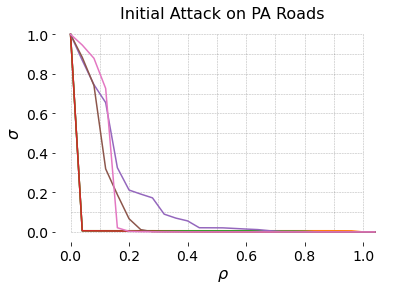

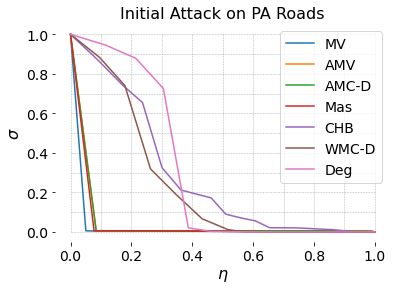

In [39]:
visualize.fragFigs(net_name, sigma_results,
                   abbrv=abbreviations, legend=True,
                  save=True)

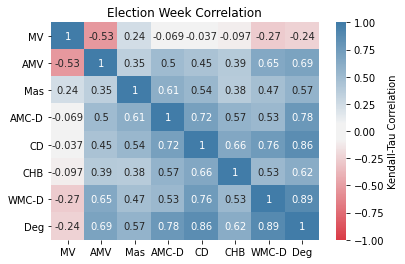

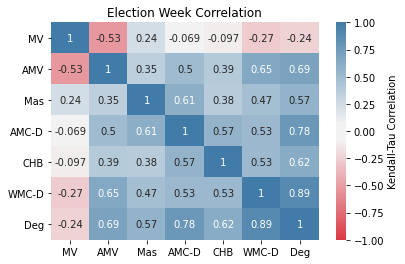

In [13]:
visualize.heatmap(net_name, value_results, abbrv=abbreviations,
                 save=True)